# Portfolio Project - Statistical Analysis of Olympics Dataset
### Michael Kenny - https://kennymichael.github.io/Michael-Kenny/

## Importing Libraries

In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from scipy.stats import pointbiserialr

## Scenario:

The purpose of this project is to demonstrate statistical techniques for data analysis, including hypothesis testing, correlation analysis, and linear regression.

The dataset is a historical dataset of the Olympic games from 1896 - 2016. Each row of the dataset corresponds to an individual athlete competing in an Olympic event. The columns are as follows:

- ID: Unique number for each athlete

- Name: Athlete's name

- Sex: M or F

- Age: Integer

- Height: In centimeters

- Weight: In kilograms

- Team: Team name

- NOC: National Olympic Committee 3-letter code

- Games: Year and season

- Year: Integer

- Season: Summer or Winter

- City: Host city

- Sport: Sport

- Event: Event

- Medal: Gold, Silver, Bronze, or NA

In [39]:
olympics = pd.read_csv('athlete_events.csv', index_col='Name') # reading csv and creating pandas dataframe from dataset
olympics.head()

,ID,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Name,,,,,,,,,,,,,,
A Dijiang,1,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
A Lamusi,2,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
Gunnar Nielsen Aaby,3,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
Edgar Lindenau Aabye,4,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
Christine Jacoba Aaftink,5,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [40]:
olympics.shape

(271116, 14)

To demonstrate hypothesis testing, we are going to test whether or not the following statement is true: 

'The mean age for an athlete competing in the Olympic games is 26.'

The first step is to state our null and alternative hypotheses. The null hypothesis will be that the statement is true, and the average age of an athlete is 26. 

H₀: μ = 26

H₁: μ != 26

We will set our significance level at the standard α = 0.05.

Our dataset comprises of all athletes that competed in the Olympic games from 1896-2016, we can consider this to be a population. For the purposes of performing hypothesis testing, we can take a random sample from our population.

In [41]:
age = olympics.Age # assigning age variable from dataset
age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [42]:
age_sample = age.sample(frac=0.1, random_state=1) # creating random sample from 10% of the population
age_sample.describe()

count    26135.000000
mean        25.575512
std          6.425813
min         11.000000
25%         21.000000
50%         24.000000
75%         28.000000
max         88.000000
Name: Age, dtype: float64

We now have a random sample 10% the size of our population. This will be the sample with which we will perform our hypothesis testing.

Now we have our data and our hypotheses, we need to select our test. The chosen test will be a Z-test. Before performing a Z-test, we need to confirm that all conditions are met. The three conditions for a Z-test about a proportion are independence, normally distributed, and randomly selected.

Our sample comprises of 23,135 data points. With a high number of elements, we can assume that our data follows a normal distribution so that a Z-test will be appropriate for hypothesis testing.

We know that the sample is random as it was taken using the pandas sample method. 

For independence, we can use the 10% rule. The 10% rule states that as long as the sample size is less than or equal to 10% of the population, we can make the assumption that our sample is independent. As our sample is exactly 10% of the population, this condition is met also, and we can conclude that a Z-test is appropriate.

H₀: μ = 26

In [43]:
μ = 26

In [44]:
sample_mean = round(age_sample.mean(), 2)
print(f'sample_μ = {sample_mean}')

sample_μ = 25.58


In [45]:
sample_std = round(age_sample.std(), 2)
print(f'sample standard deviation = {sample_std}')

sample standard deviation = 6.43


In [46]:
z = (sample_mean - μ) / (sample_std/math.sqrt(26135))
print(f'z score = {z}')

z score = -10.559651117525867


### Conclusions

From our z-table, a z-score of -10.55 gives us a P-value of 0.00001. This is far below our significance level α = 0.05, and as such we can reject the null hypothesis.


With such a large sample size, we were able to calculate the probability of our hypothesis with a high degree of accuracy. 

Even though the null hypothesis H₀: μ = 26 is not far from the sample mean μ = 25.58, due to our sample size of more than 26,000 we could determine that the probability of the null hypothesis being true was essentially 0.

## Correlation Analysis

To demonstrate correlation analysis, we can investigate the correlation between a competing athletes age, and their sex.

In [47]:
age = olympics.Age
age.describe()

count    261642.000000
mean         25.556898
std           6.393561
min          10.000000
25%          21.000000
50%          24.000000
75%          28.000000
max          97.000000
Name: Age, dtype: float64

In [48]:
sex = olympics.Sex
sex.describe()

count     271116
unique         2
top            M
freq      196594
Name: Sex, dtype: object

In [49]:
df = pd.DataFrame(data= {'age':age, 'sex':sex})
df

,age,sex
Name,,
A Dijiang,24.0,M
A Lamusi,23.0,M
Gunnar Nielsen Aaby,24.0,M
Edgar Lindenau Aabye,34.0,M
Christine Jacoba Aaftink,21.0,F
...,...,...
Andrzej ya,29.0,M
Piotr ya,27.0,M
Piotr ya,27.0,M


In [50]:
df.sex.value_counts()

M    196594
F     74522
Name: sex, dtype: int64

With our dataframe defined, the first step in looking for correlation is to visualize the data. To do so can use a scatter plot of the athlete's age with different colours for the different sexes, blue for male and red for female. 

Before creating the plot, we are going to take a random sample from the dataframe equal to 10% of the entire population. This is for greater clarity in the plot, as we have a very larger data set with 271,000 rows, plotting every single data point will render the plot messy and harder to read. A sample 10% the size of the population can make our plot cleaner and easier to read with while still being representative of the population. As the sample is random, it will not skew the results and can be considered representative of the population.

In [51]:
df_sample = df.sample(frac=0.1, random_state=1)
df_sample

,age,sex
Name,,
Gwon Jung-Hyeon,26.0,M
Hiroshi Suzuki,36.0,M
Jaroslav Jebek,33.0,M
Lia Vanea,26.0,F
Pentti Tapio Aleksi Linnosvuo (Lindroos-),27.0,M
...,...,...
Marius Daniel Urzic,28.0,M
Vegard Stake Laengen,23.0,M
Michael Joeseph Boxall,19.0,M


In [52]:
df_sample.sex.value_counts()

M    19750
F     7362
Name: sex, dtype: int64

Text(0.5, 0, 'Male and Female Athletes')

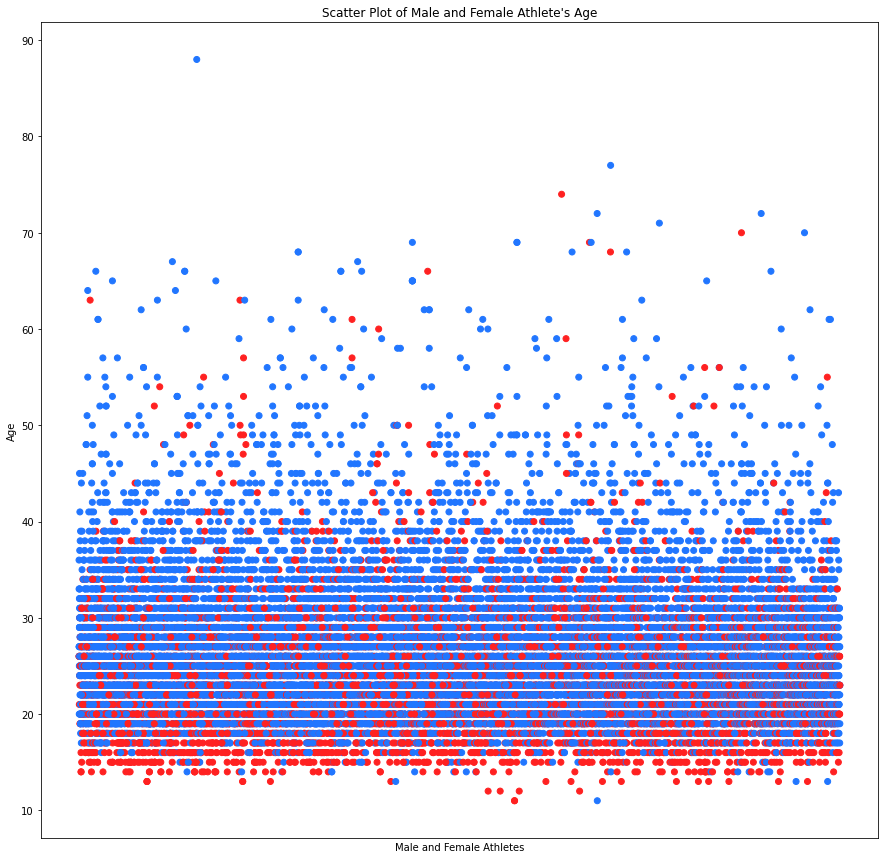

In [53]:
plt.figure(figsize=(15,15))
colour = ['#ff2121' if y == 'F' else '#2176ff' for y in df_sample.sex]
plt.scatter(x = df_sample.index, y = df_sample.age, c=colour)
plt.xticks([])
plt.title('Scatter Plot of Male and Female Athlete\'s Age')
plt.ylabel('Age')
plt.xlabel('Male and Female Athletes')

From the scatter plot we can see that the data is mostly evenly dispersed, with some noticeable differences on the upper and lower sections of the plot. The 10-15 range is primarily red indicating more female athletes. The 15-40 range is evenly dispersed, and the 40-80 range looks to be made up of a majority male grouping of athletes. The differences is spread on the upper and lower ranges of the plot, are an indication that there is some correlation between the sex and age variables. We can expect the correlation to be small, as the vast majority of our data points lie within the middle of the plot which looks to be relatively evenly distributed.

With a clear picture of the relative spread of the data, we can now calculate the correlation coefficient between the age and sex variables. Before any correlation methods can be used, we must first transform our categorical data from a string to numeric format so they can be interpreted by pandas correlation methods. 'M' will be replaced by a 0, and 'F' replaced by a 1. These are still categorical variables and not continuous ie. the difference between 0-1 is irrelevant and must be accounted for in our results.

In [54]:
df.replace('M', 0, inplace=True)
df.replace('F', 1, inplace=True)
df.dropna(inplace=True)
df

,age,sex
Name,,
A Dijiang,24.0,0
A Lamusi,23.0,0
Gunnar Nielsen Aaby,24.0,0
Edgar Lindenau Aabye,34.0,0
Christine Jacoba Aaftink,21.0,1
...,...,...
Andrzej ya,29.0,0
Piotr ya,27.0,0
Piotr ya,27.0,0


With the data transformed, a correlation coefficient can now be calculated. The first calculation we want to try is using the pandas.corr method, which works using the Pearson correlation coefficient calculation.

In [55]:
df.corr()

,age,sex
age,1.000000,-0.179324
sex,-0.179324,1.000000


Here we can see a resulting correlation coefficient of -0.179, which when made positive is r = 0.179. This indicates a weak correlation between age and sex. When compared to the scatter plot, the result is as expected. The majority of the scatter plot in the 15-40 age range being a homogenous mix of both genders, results in the observed weak correlation. However, it is still a non-zero result, there is correlation between the two, as observed in the extremities of the scatter plot.

Another correlation coefficient to look at is the point-biserial correlation coefficient. This coefficient is specific to continuous and dichotomous data, here age being continuous and sex dichotomous. To calculate the point-biserial we can use the SciPy stats module.

In [56]:
pbc = pointbiserialr(df.age, df.sex)
pbc

PointbiserialrResult(correlation=-0.1793241174923317, pvalue=0.0)

The result is the same as with the Pearson method, r = 0.179. This is as expected, as the two methods are mathematically equivalent. The result affirms the findings, and is more applicable to the categorical and continuous data used than the Pearson method for continuous variables. 

With a correlation coefficient calculated and corroborated using different methods, we can visualize the findings in a heatmap.

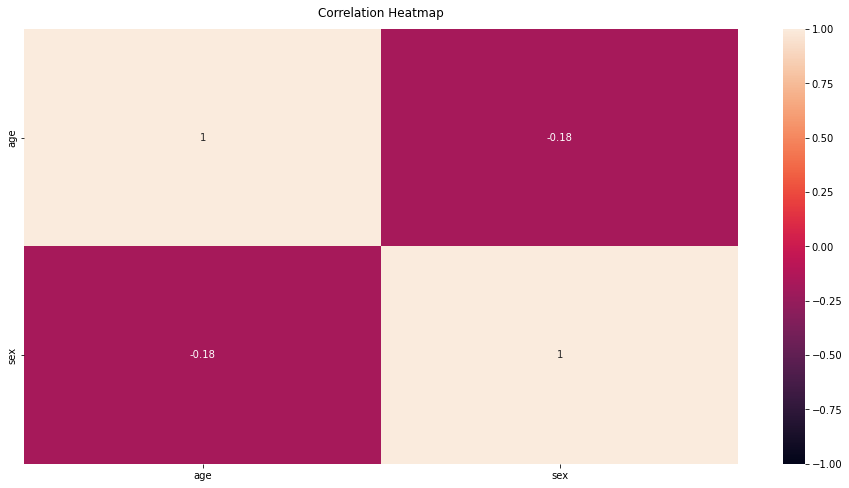

In [57]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Linear Regression

Ideal candidates for use in a linear regression model, are the variables height and weight. These two variables are by nature linked, and as such we could expect to find predictive power between the two.

In [58]:
height = olympics.Height
height.describe()

count    210945.000000
mean        175.338970
std          10.518462
min         127.000000
25%         168.000000
50%         175.000000
75%         183.000000
max         226.000000
Name: Height, dtype: float64

In [59]:
weight = olympics.Weight
weight.describe()

count    208241.000000
mean         70.702393
std          14.348020
min          25.000000
25%          60.000000
50%          70.000000
75%          79.000000
max         214.000000
Name: Weight, dtype: float64

In [60]:
df = pd.DataFrame(data= {'height':height, 'weight':weight}) 
df.dropna(inplace=True)
df

,height,weight
Name,,
A Dijiang,180.0,80.0
A Lamusi,170.0,60.0
Christine Jacoba Aaftink,185.0,82.0
Christine Jacoba Aaftink,185.0,82.0
Christine Jacoba Aaftink,185.0,82.0
...,...,...
Andrzej ya,179.0,89.0
Piotr ya,176.0,59.0
Piotr ya,176.0,59.0


>The first step is to visualize the data and see if we can see any kind of correlation between the height and weight variables. The best choice for this is a scatter plot.

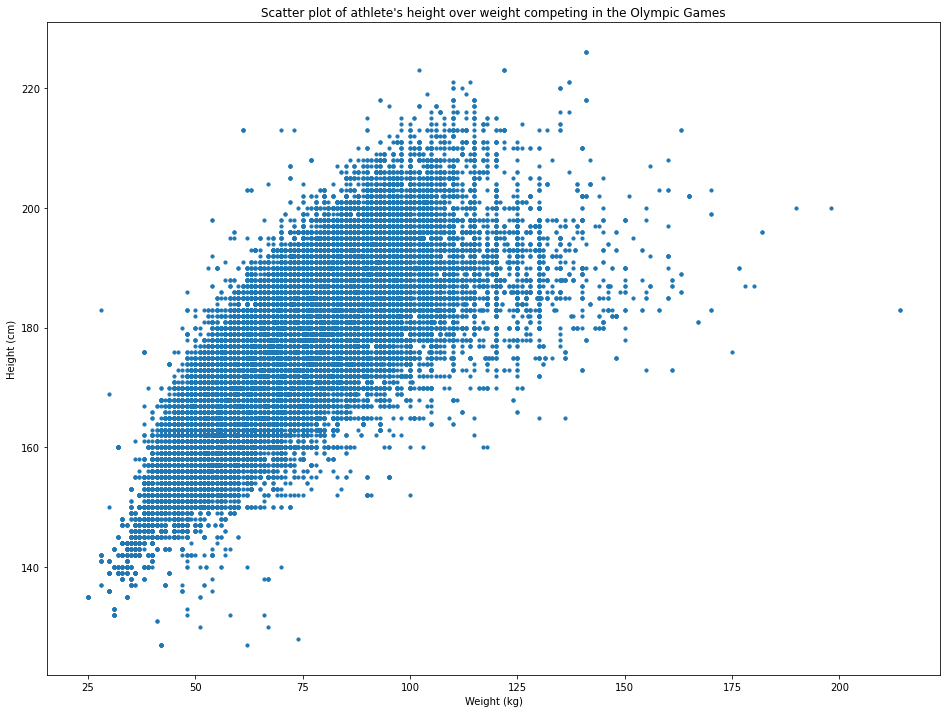

In [61]:
plt.figure(figsize= (16,12))
plt.scatter(x = df.weight, y = df.height, s= 10)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Scatter plot of athlete\'s height over weight competing in the Olympic Games')
plt.show()

From the scatter plot we can suspect a positive linear relationship, as the athlete's height increases so does the athlete's weight. This is a good indication that a linear regression model built using our data will have some predictive power.

To confirm this, we can see if there is correlation between the two variables using the Pearson correlation method.

In [62]:
df.corr(method='pearson')

,height,weight
height,1.000000,0.796213
weight,0.796213,1.000000


The correlation coefficient between the two variables is 0.796213, indicating that there is a high degree of positive correlation between the two, which confirms the suspected relationship from our scatter plot. We can now begin to build our linear regression model.

In [63]:
lm = LinearRegression(fit_intercept=True) # creating linear regression model

In [64]:
lm.fit(X = df.weight.to_frame(), y=df.height) # fitting the model

LinearRegression()

Now that we have our model defined with the variable 'lm', and fit to our data, we can examine the slope of it to see if our expectation of a positive linear relationship was correct.

In [65]:
slope = round(lm.coef_[0], 2) # slope of Regression line
print(f'The slope of the linear regression model is {slope}')

The slope of the linear regression model is 0.59


The slope of the model is 0.59 and positive, which is as we would expect from our scatter plot. We can also check the y-intercept of our regression model for more insight on how the line fits our data.

In [66]:
intercept = round(lm.intercept_, 2) # intercept of regression line (where crosses y axis)
print(f'The y-intercept of the linear regression model is {intercept}')

The y-intercept of the linear regression model is 133.96


Using the y-intercept, slope, and one other data point, we can graph our linear regression for further clarity.

In [67]:
x_lin = np.array([20, 200])
y_lin = intercept + slope * x_lin

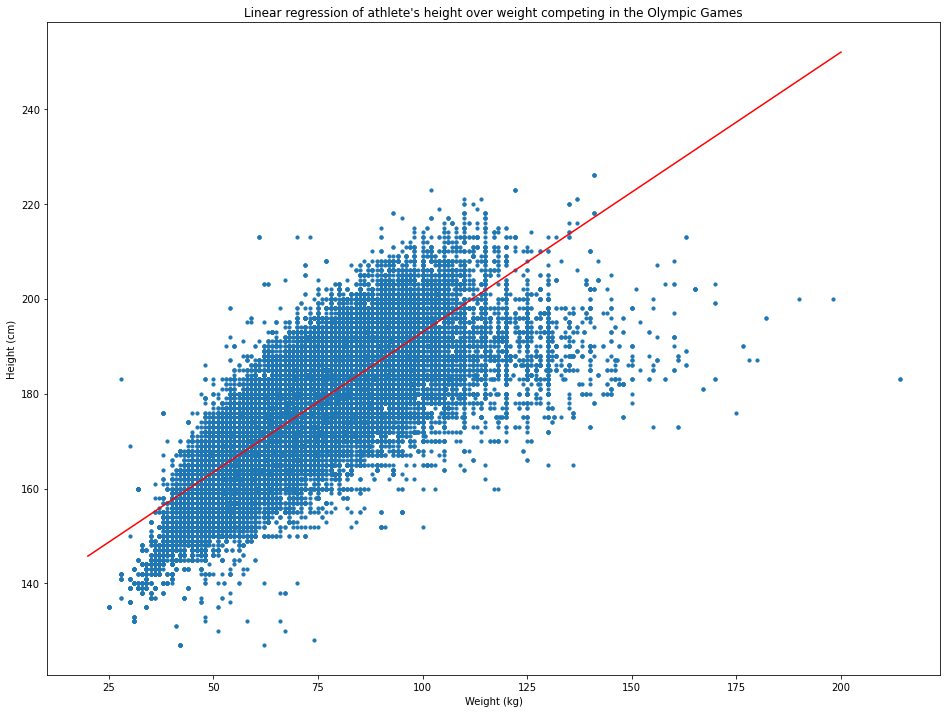

In [68]:
plt.figure(figsize= (16,12))
plt.scatter(x = df.weight, y = df.height, s= 10)
plt.plot(x_lin, y_lin, c = 'red', label = 'Regression Line')
plt.title('Linear regression of athlete\'s height over weight competing in the Olympic Games')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.show()

The red line shows the linear fit of the data that we will use to make predictions. As expected, it shows a positive relationship between height and weight with a positive slope.

This graph gives us a good indication that our line fits the data, and we can now test the predictive power of our model. Using the predict method, we can create a new column in our dataframe by which we try and predict the athlete's height based on their weight. We can then compare this prediction against the actual height of the athlete's to assess the predictive power of our model.

In [69]:
df['height_prediction'] = lm.predict(df.weight.to_frame())
df.head(10)

,height,weight,height_prediction
Name,,,
A Dijiang,180.0,80.0,180.819602
A Lamusi,170.0,60.0,169.105089
Christine Jacoba Aaftink,185.0,82.0,181.991053
Christine Jacoba Aaftink,185.0,82.0,181.991053
Christine Jacoba Aaftink,185.0,82.0,181.991053
Christine Jacoba Aaftink,185.0,82.0,181.991053
Christine Jacoba Aaftink,185.0,82.0,181.991053
Christine Jacoba Aaftink,185.0,82.0,181.991053
Per Knut Aaland,188.0,75.0,177.890974


In [70]:
df.tail(10)

,height,weight,height_prediction
Name,,,
Fernando scar Zylberberg,168.0,76.0,178.476699
"James Francis ""Jim"" Zylker",175.0,75.0,177.890974
Aleksandr Viktorovich Zyuzin,183.0,72.0,176.133797
Aleksandr Viktorovich Zyuzin,183.0,72.0,176.133797
Olga Igorevna Zyuzkova,171.0,69.0,174.376620
Andrzej ya,179.0,89.0,186.091133
Piotr ya,176.0,59.0,168.519363
Piotr ya,176.0,59.0,168.519363
Tomasz Ireneusz ya,185.0,96.0,190.191212


Just from looking at the top and bottom ends of the data, we can see a number of the predicted figures are not too far off from the actual values. Height predictions for A Dijang and A Lamusi for example are both within less than a centimetre of the actual values.

To measure how well our observed height data are replicated by our predictions, we can find the coefficient of determination or r^2 between the two variables.

In [71]:
R_square = r2_score(df.height , df.height_prediction) 
print('The coefficient of determination is:', R_square)

The coefficient of determination is: 0.6339552880572827


The R-squared coefficient 0.63 indicates there is a good fit. We can say that 63% of the dependent variable (height), is predicted by the independent variable (weight).